In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [202]:
data = pd.read_csv(r'USvideos.csv')
data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [203]:
data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [204]:
print(data.shape)
print(data[data['views'] > 10000].shape)
print(data[(data['views'] > 10000 ) & ((data['publish_time'].str.contains('2017')) | (data['publish_time'].str.contains('2018'))) ].shape)

(40949, 16)
(40122, 16)
(39957, 16)


In [205]:
data = data[(data['views'] > 10000 ) & ((data['publish_time'].str.contains('2017')) | (data['publish_time'].str.contains('2018'))) ]

In [206]:
data.to_csv('new.csv')

In [207]:
a = (( data['likes'] + data['dislikes'] ) / data['views']).values.tolist()

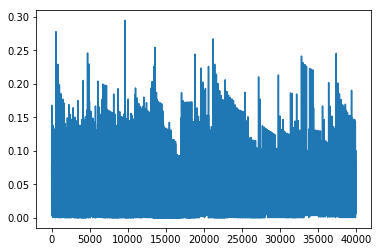

In [208]:
plt.plot(a)
plt.show()

In [209]:
print("MAX：" + str(data['views'].values.max()))
print("MIN：" + str(data['views'].values.min()))

MAX：225211923
MIN：10001


In [238]:
# data[data['views'] <= 2000000 ]
L = []
D = []
C = []
V = []
for num in range(5000000,225211923,5000000):
    L.append(data[ data['views'] <= num ]['likes'].values.sum())
    D.append(data[ data['views'] <= num ]['dislikes'].values.sum())
    C.append(data[ data['views'] <= num ]['comment_count'].values.sum())
    V.append(num)
print(L)
print(D)
print(C)
print(V)

[1282355424, 1733972382, 2009355091, 2223257840, 2352942553, 2437988182, 2501822240, 2574859910, 2621169483, 2665230847, 2704602768, 2741273897, 2764084988, 2792075956, 2811869460, 2821084894, 2839683692, 2860981879, 2874148683, 2886480471, 2900948519, 2909221484, 2920394049, 2932219170, 2947790731, 2954290888, 2958040698, 2962480665, 2966365735, 2976555773, 2976555773, 2980666652, 2984869297, 2989151116, 2993511237, 2997948412, 3002460738, 3002460738, 3007055669, 3011712598, 3016427540, 3021204220, 3026040668, 3030974856, 3035937259]
[52815708, 75213256, 87198960, 95874337, 104571426, 109332958, 114978911, 121138201, 123160652, 125006400, 127500075, 129152284, 130203225, 131535145, 132384803, 133935770, 134670203, 135562554, 136110642, 136670350, 138548245, 138855720, 140639310, 141144364, 141716894, 143467904, 143694545, 145416726, 145658112, 147683038, 147683038, 147944559, 148214089, 148490715, 148774676, 149065774, 149363931, 149363931, 149669366, 149980408, 150296537, 150618030, 

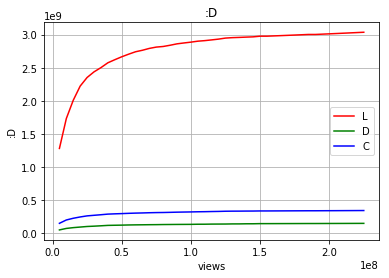

In [253]:
# plt.plot(V, L, V, D, V, C)
plt.plot(V, L, "r-", label="L")
plt.plot(V, D, "g-", label="D")
plt.plot(V, C, "b-", label="C")
plt.title(":D")
plt.xlabel("views")
plt.ylabel(":D")
plt.grid(True)
plt.legend()
plt.show()